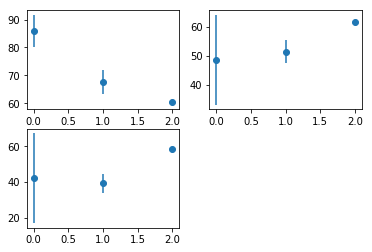

In [122]:
%matplotlib inline

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import sem

data = {'group1': [ {'round': 1, 
                     'responses': [97,74,22]},
                    {'round': 2,
                     'responses': [76, 59, 50]},
                    {'round': 3,
                     'responses': [62, 61, 59]}
                  ],
        'group2': [ {'round': 1, 
                     'responses': [78,51,12]},
                    {'round': 2,
                     'responses': [65, 49, 35]},
                    {'round': 3,
                     'responses': [60, 61, 57]}
                  ],
        'group3': [ {'round': 1, 
                     'responses': [83,21,92]},
                    {'round': 2,
                     'responses': [62, 46, 33]},
                    {'round': 3,
                     'responses': [59, 63, 60]}
                  ],
       }

# in the event that the lists are unsorted, sort them first
data['group1'] = sorted(data['group1'], key=lambda d: d['round'])
data['group2'] = sorted(data['group2'], key=lambda d: d['round'])
data['group3'] = sorted(data['group3'], key=lambda d: d['round'])

# prepare a questions list which will have 3 lists for our dataset
questions = []

# append blank lists of len equal to the number of questions
[ questions.append([]) for i in range(0,len(data['group1'][0]['responses'])) ]

# make an xaxis of range 0 to len(questions)
xaxis = np.arange(0, len(questions))

# go through each question list and append another list for each round
for qi in range(0,len(questions)):
    [questions[i].append([]) for i in range(0,len(data['group1']))]

# iterate the dataset, starting with groups
for group in data.values():
    
    # iterate the rounds in each group
    for i, qround in enumerate(group):
        
        # iterate the responses to each question, appending the responses 
        # to the appropriate position in questions
        for qi in range(0,len(questions)):
            questions[qi][i].append(qround['responses'][qi])
        

questionsstandarderrors = []
questionsmeans = []

# iterate the questions and create an sem and mean list for each
for qi in range(0,len(questions)):
    questionsstandarderrors.append([])
    questionsmeans.append([])
    questionsstandarderrors[qi] = [sem(r) for r in questions[qi]]
    questionsmeans[qi] = [np.mean(i) for i in questions[qi]]

axes = []

# plot the error bar in three separate graphs
for qi in range(0,len(questions)):
    axes.append([])
    axes[qi] = plt.subplot( np.ceil(len(questions) / 2),2,qi+1)
    axes[qi].errorbar(xaxis, questionsmeans[qi], questionsstandarderrors[qi], fmt="o")


plt.show()
